In [29]:
import pandas as pd
from icecream import ic
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
plt.rcParams.update({'figure.figsize': (10, 7), 'figure.dpi': 120})

# What is a Time Series?
Time series is a sequence of observations recorded at regular time intervals.  Ordering among data points is important and cannot be destroyed. 

Depending on the frequency of observations, a time series may typically be hourly, daily, weekly, monthly, quarterly and annual. Sometimes, you might have seconds and minute-wise time series as well, like, number of clicks and user visits every minute etc.

The regular time intervals can be ``daily`` (stock market prices), ``weekly`` (product manufactured), ``monthly`` 
(unemployment rate), ``quarterly`` (sales of product), ``annual`` (GDP), ``quinquennial``, that is in every 5 years 
(Census of manufactures), or ``decennial`` (census of population). 

In [196]:
path="F:/insofe/lecture/3.Time Series Analysis/data/"
fileName="us-air-carrier-traffic-statistic.csv"
filePath='F:/insofe/lecture/3.Time Series Analysis/data/us-air-carrier-traffic-statistic.csv'
df=pd.read_csv(filePath)
#milestimeseries <- ts(miles, frequency = 12, start = c(1996,1))
df['Date']=pd.date_range(start='1996',periods=df.shape[0], freq='M')
ic(df.shape)
df.head()

ic| df.shape: (204, 2)


,miles,Date
0,41972194,1996-01-31
1,42054796,1996-02-29
2,50443045,1996-03-31
3,47112397,1996-04-30
4,49118248,1996-05-31


In [216]:
df.set_index('Date', inplace=True)

In [218]:
plt.figure(figsize=(16,5), dpi=1000)
plt.plot(df.index,df.miles)
plt.ylabel('miles')
plt.xlabel('years')

Text(0.5, 0, 'years')

## Air Passenger Miles (Two Side View)

Text(0.5, 0, 'years')

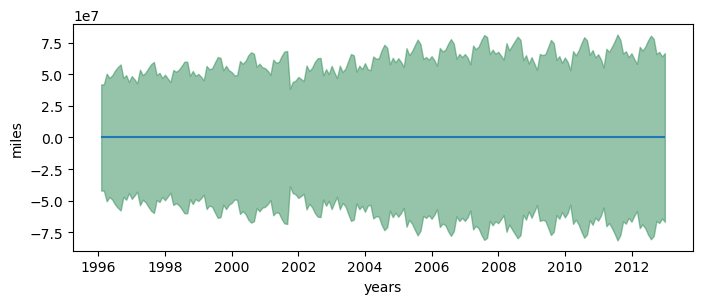

In [219]:
fig, ax= plt.subplots(nrows=1, ncols=1, figsize=(8,3), dpi=100)
plt.fill_between(x=df.index, y1=df.miles, y2=-df.miles, alpha=0.5, color='seagreen')
plt.hlines(y=0, xmin=min(df.index),xmax=max(df.index))
plt.ylabel('miles')
plt.xlabel('years')

In [220]:
df['year'] =  [d.year for d in df.index]
df['month'] =  [d.strftime('%b') for d in df.index]
years = df['year'].unique()
df.head()

,miles,year,month
Date,,,
1996-01-31,41972194,1996,Jan
1996-02-29,42054796,1996,Feb
1996-03-31,50443045,1996,Mar
1996-04-30,47112397,1996,Apr
1996-05-31,49118248,1996,May


In [221]:
np.random.seed(100)
mycolors=np.random.choice(list(mpl.colors.XKCD_COLORS.keys()), len(years), replace=False)


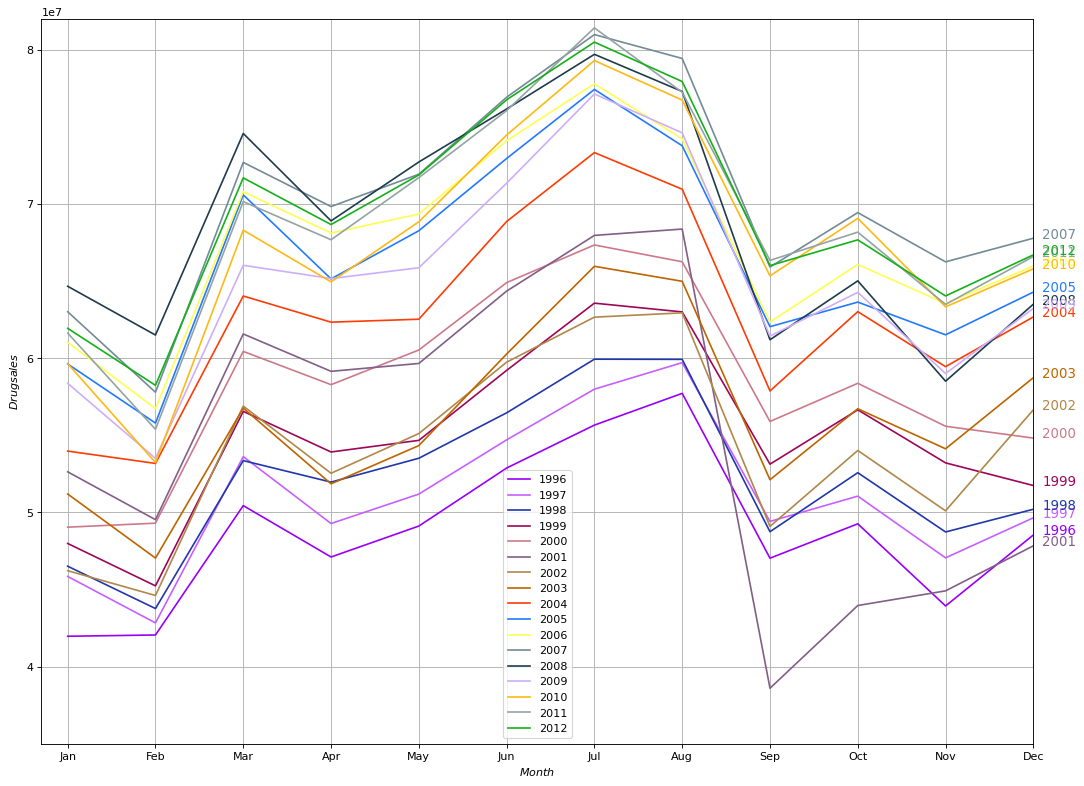

In [222]:
plt.figure(figsize=(16,12), dpi= 80)
for i, year in enumerate(years):
    plt.plot( 'month','miles', data=df.loc[df['year']==year,:], color=mycolors[i], label=year)
    plt.text( df.loc[df['year']==year,:].shape[0]-0.9, df.loc[df['year']==year, 'miles'][-1:].values[0],year,fontsize=12,color=mycolors[i])
        
plt.gca().set(xlim=(-0.3,11), ylim=(3.5e7,8.2e7), xlabel='$Month$',ylabel='$miles$')
plt.legend(loc='best')
plt.grid()
#plt.yticks(fontsize=12, alpha=.7)

<Figure size 1280x960 with 0 Axes>

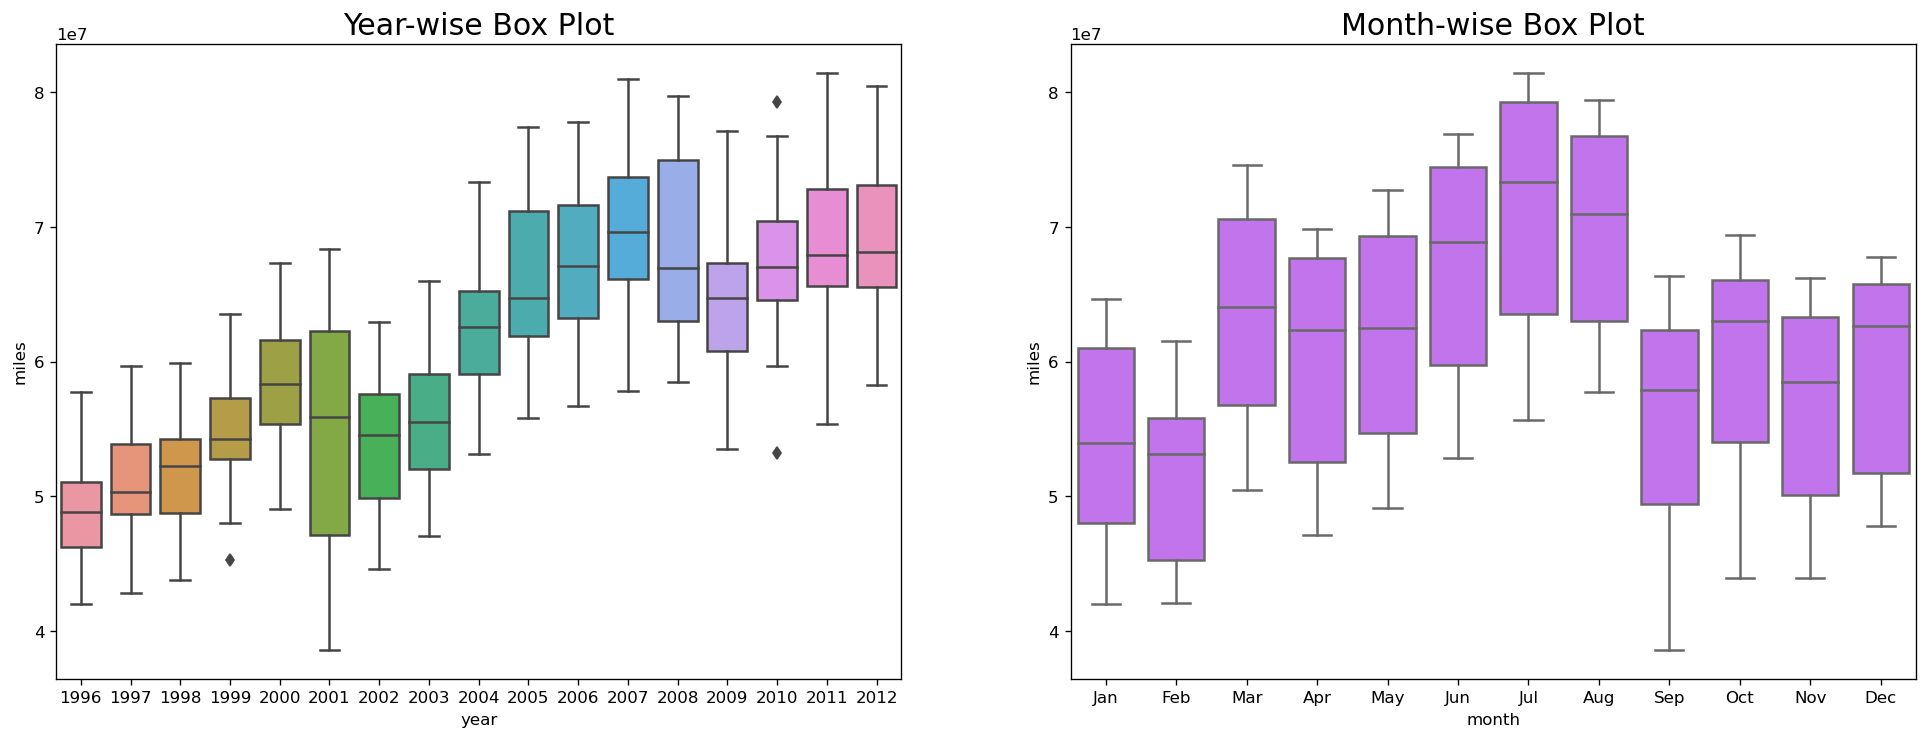

In [223]:
plt.figure(figsize=(16,12), dpi= 80)
fig, axes = plt.subplots(1, 2, figsize=(20,7))
sns.boxplot(x= 'year',y='miles', data=df, ax=axes[0])
sns.boxplot(x= 'month',y='miles', data=df, color=mycolors[1])

axes[0].set_title('Year-wise Box Plot', fontsize=18); 
axes[1].set_title('Month-wise Box Plot', fontsize=18); 

<Figure size 1280x960 with 0 Axes>

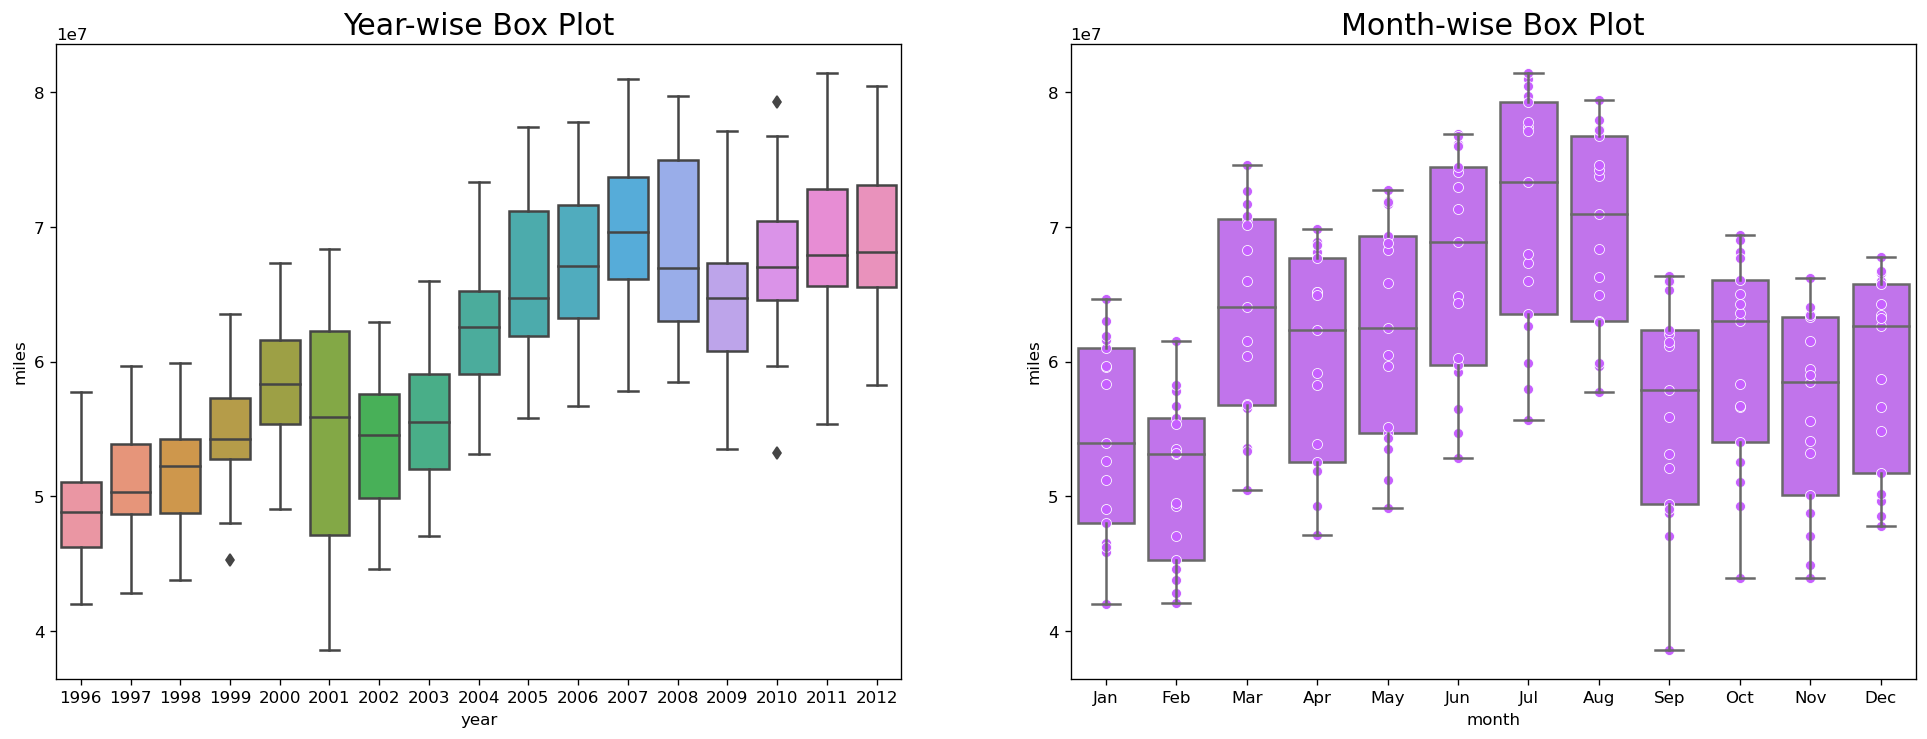

In [224]:
plt.figure(figsize=(16,12), dpi= 80)
fig, axes = plt.subplots(1, 2, figsize=(20,7))

sns.boxplot(x= 'year',y='miles', data=df, ax=axes[0])
#sns.scatterplot(x= 'year',y='miles', data=df, ax=axes[0])
sns.boxplot(x= 'month',y='miles', data=df, color=mycolors[1])
sns.scatterplot(x= 'month',y='miles', data=df, color=mycolors[1])

axes[0].set_title('Year-wise Box Plot', fontsize=18); 
axes[1].set_title('Month-wise Box Plot', fontsize=18); 

##  Decompose a time series into its components

There are various forces that may affect the observations in a time series. The three important components 
are: 
* I.  **Trend ($T_{t}$)**  (Long term movement) 
    * When the series increases (or decreases) over the entire length of time. 
    * ``Example:`` price of a share may increase or decrease linearly over a period of time., the sales of a new product may increase exponentially (or non-linearly).
* II.  **Seasonal($S_{t}$)component: ** Intra-year stable fluctuations repeatable over the entire length of the series 
    * When a series is observed with more frequently than a year (quarterly or monthly for example), the series is subject to rhythmic fluctuations which are stable and repeatable each year. 
    * ``Example:`` sales of umbrella increase in rainy season whereas sales of AC increase in summers and sales 
of  woolen clothes  increase  in  winters.
* III.  **Irregular/Random($R_{t}$) component ** (Random movements) 
    * fluctuations are purely random, erratic, unforeseen, and unpredictable. This is the random component of time series. 
   
Trend and seasonal components are part of systematic components of time series. 
 
* Additive Model: $Y_{t}$  = $T_{t}$ + $S_{t}$  + $I_{t}$  is considered when the resultant series is the sum of the components. 

* Multiplicative Model: $Y_{t}$  = $T_{t}$ * $S_{t}$  * $I_{t}$ is considered when the resultant time series is the product of the 
components. 

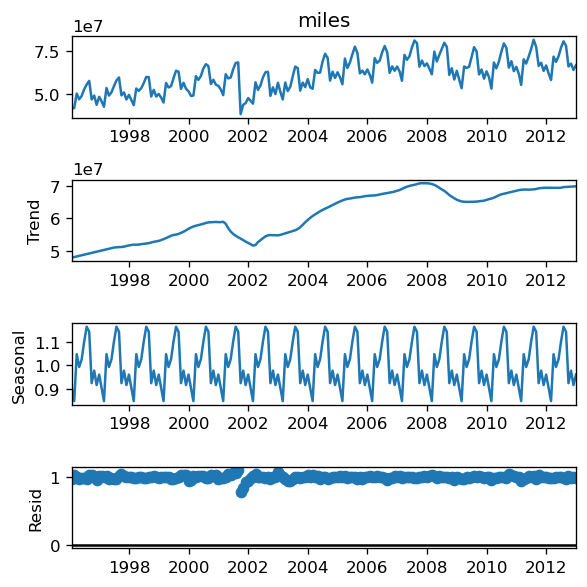

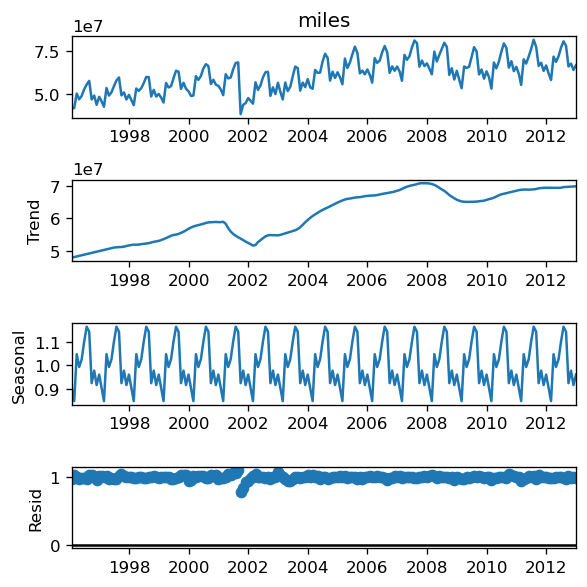

In [225]:
from statsmodels.tsa.seasonal import seasonal_decompose
#from dateutil.parser import parse
# Multiplicative Decomposition 
result_mul = seasonal_decompose(df['miles'], model='multiplicative', extrapolate_trend='freq')
result_mul.plot()

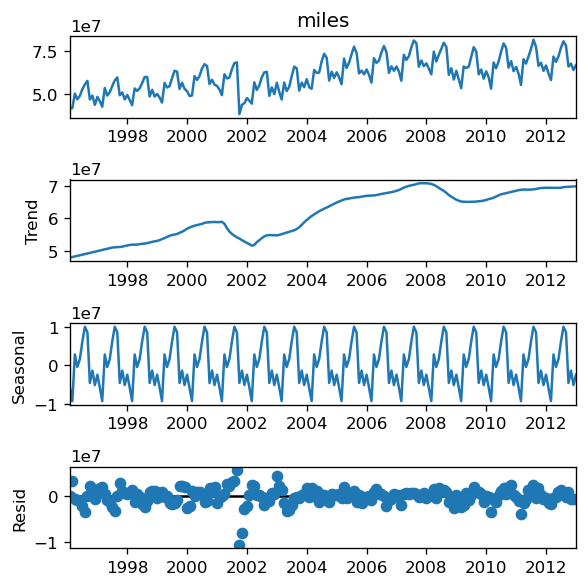

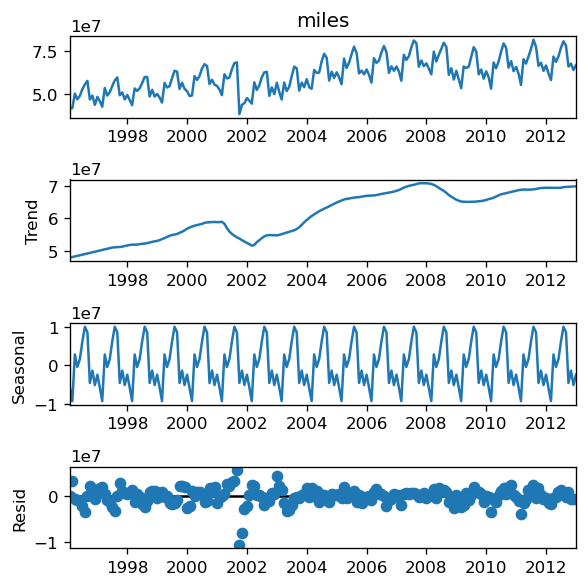

In [226]:
result_add = seasonal_decompose(df['miles'], model='additive', extrapolate_trend='freq')
result_add.plot()

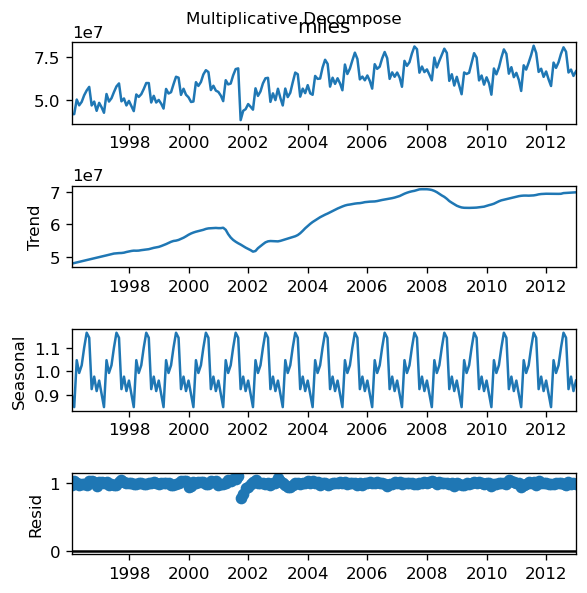

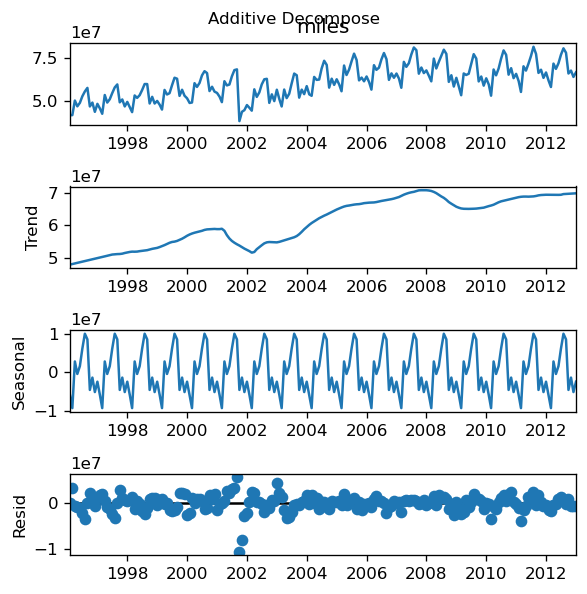

In [227]:
# Plot
plt.rcParams.update({'figure.figsize': (5,5)})
result_mul.plot().suptitle('Multiplicative Decompose', fontsize=10)
result_add.plot().suptitle('Additive Decompose', fontsize=10)
plt.show()

## Extract the Components 
---

In [228]:
# Actual Values = Product of (Seasonal * Trend * Resid)
df_reconstructed = pd.concat([result_mul.seasonal, result_mul.trend, result_mul.resid, result_mul.observed], axis=1)
df_reconstructed.columns = ['seasonal', 'trend', 'resid', 'actual_values']
df_reconstructed.head()

,seasonal,trend,resid,actual_values
Date,,,,
1996-01-31,0.901092,4.789653e+07,0.972497,41972194.0
1996-02-29,0.846902,4.807804e+07,1.032846,42054796.0
1996-03-31,1.047572,4.825955e+07,0.997778,50443045.0
1996-04-30,0.992873,4.844106e+07,0.979553,47112397.0
1996-05-31,1.025832,4.862257e+07,0.984757,49118248.0


# Stationary and Non-Stationary Time Series

 A stationary series is one where the values of the series is not a function of time.
 
 The statistical properties of the series like mean, variance and autocorrelation are constant over time. Autocorrelation of the series is nothing but the correlation of the series with its previous values, more on this coming up.

In [306]:
df.drop(['year', 'month'], axis=1,inplace=True)

In [312]:
TS_Train =  df[df.index.year<= 2011]
TS_Test = df[df.index.year> 2011]

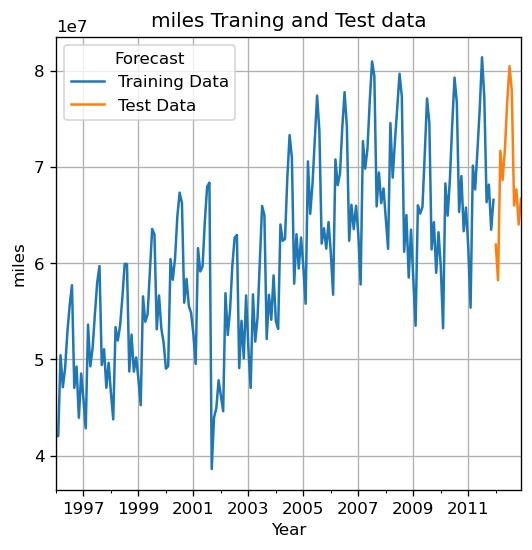

In [327]:
TS_Train['miles'].plot() 
TS_Test['miles'].plot()
plt.grid() 
plt.title('miles Traning and Test data') 
plt.xlabel('Year') 
plt.ylabel('miles') 
plt.legend(['Training Data','Test Data'],title='Forecast')


## Forecasting Methods 
 
### Exponential Smoothing Method: 

In [315]:
from statsmodels.tsa.api import ExponentialSmoothing 

In [330]:
TS_Train_HW = ExponentialSmoothing(TS_Train,seasonal='additive',trend='additive',freq='M') 
TS_Train_HW_autofit = TS_Train_HW.fit(optimized=True) 


C:\Users\Suji\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:427: FutureWarning: After 0.13 initialization must be handled at model creation
  warnings.warn(
C:\Users\Suji\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:920: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


In [331]:
TS_Train_HW_autofit.params_formatted 

,name,param,optimized
smoothing_level,alpha,5.000000e-01,True
smoothing_trend,beta,1.000000e-04,True
smoothing_seasonal,gamma,3.750000e-01,True
initial_level,l.0,5.396308e+07,True
initial_trend,b.0,1.850404e+05,True
initial_seasons.0,s.0,-1.199088e+07,True
initial_seasons.1,s.1,-1.190828e+07,True
initial_seasons.2,s.2,-3.520032e+06,True
initial_seasons.3,s.3,-6.850680e+06,True
initial_seasons.4,s.4,-4.844829e+06,True


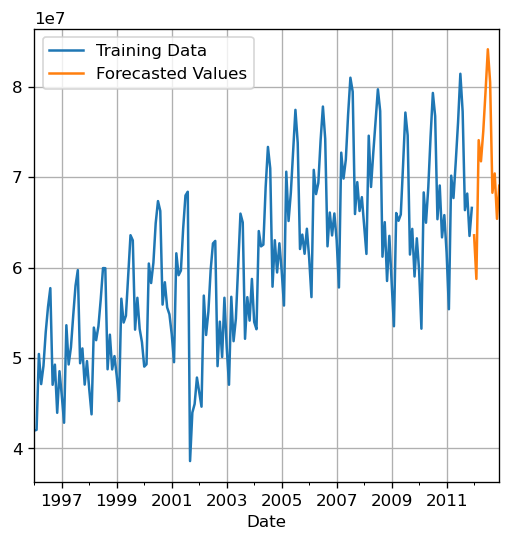

In [332]:
TES_pred = TS_Train_HW_autofit.forecast(steps=len(TS_Test)) 
TS_Train['miles'].plot() 
TES_pred.plot() 
plt.grid() 
plt.legend(['Training Data','Forecasted Values']); 

In [333]:
TS_Test['miles']

Date
2012-01-31    61940180
2012-02-29    58243763
2012-03-31    71696039
2012-04-30    68669228
2012-05-31    71887523
2012-06-30    76760759
2012-07-31    80499353
2012-08-31    77945138
2012-09-30    66007760
2012-10-31    67677764
2012-11-30    64039209
2012-12-31    66702988
Name: miles, dtype: int64

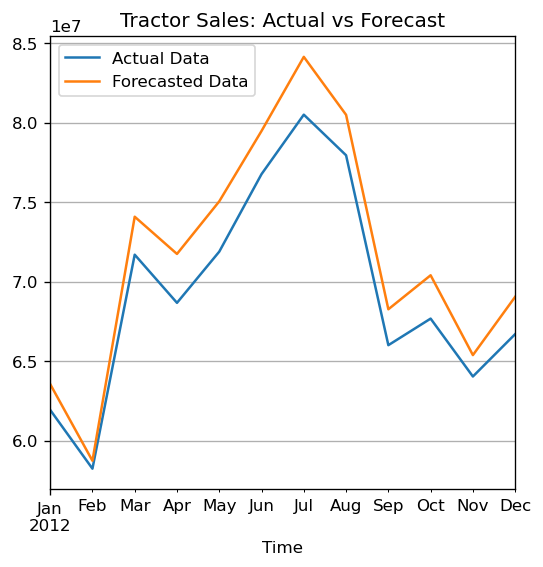

In [334]:
 
## Plotting only the forecast and the test data 
 
TS_Test['miles'].plot() 
TES_pred.plot() 
plt.grid() 
plt.title('Tractor Sales: Actual vs Forecast') 
plt.xlabel('Time') 
plt.legend(['Actual Data','Forecasted Data']); 

In [335]:
from sklearn.metrics import mean_squared_error 

In [336]:
 
## Mean Absolute Percentage Error (MAPE) - Function Definition 
 
def mean_absolute_percentage_error(y_true, y_pred): 
    return np.mean((np.abs(y_true-y_pred))/(y_true))*100 
 
RMSE = mean_squared_error(TS_Test,TES_pred,squared=False) 
MAPE = mean_absolute_percentage_error(TS_Test['miles'],TES_pred) 
 
resultsDf = pd.DataFrame({'Test RMSE': [RMSE],'Test MAPE':[MAPE]} 
                           ,index=['TripleExponentialSmoothing']) 
resultsDf 

,Test RMSE,Test MAPE
TripleExponentialSmoothing,2.498130e+06,3.337638


In [ ]:
additive